## import and install packages

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [15]:
from rpy2.robjects.packages import importr

# do the following _only the first time_, to install the package seqLogo
base = importr('base')
# base.source("http://www.bioconductor.org/biocLite.R")
biocinstaller = importr("BiocManager")
utils = importr('utils')

# load the installed package "seqLogo"
# seqlogo = importr("seqLogo")

<rpy2.rinterface_lib.sexp.NULLType object at 0x123ff5b48> [RTYPES.NILSXP]

In [19]:
# install packages
utils.install_packages('DESeq2')
utils.install_packages('RColorBrewer')
utils.install_packages('pheatmap')
utils.install_packages('tidyverse')

R[write to console]: trying URL 'https://cran.revolutionanalytics.com/bin/macosx/contrib/4.0/RColorBrewer_1.1-2.tgz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 52881 bytes (51 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c


The downloaded binary packages are in
	/var/folders/78/csfqfnqn1c5562chxtgm1j600000gn/T//RtmpNsNeT4/downloaded_packages


R[write to console]: trying URL 'https://cran.revolutionanalytics.com/bin/macosx/contrib/4.0/pheatmap_1.0.12.tgz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 76117 bytes (74 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons


The downloaded binary packages are in
	/var/folders/78/csfqfnqn1c5562chxtgm1j600000gn/T//RtmpNsNeT4/downloaded_packages


R[write to console]: trying URL 'https://cran.revolutionanalytics.com/bin/macosx/contrib/4.0/tidyverse_1.3.0.tgz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 432850 bytes (422 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co


The downloaded binary packages are in
	/var/folders/78/csfqfnqn1c5562chxtgm1j600000gn/T//RtmpNsNeT4/downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x123ff5b48> [RTYPES.NILSXP]

### Setup

In [24]:
pd.set_option('display.max_rows', 500)

### Import data & exploratory data analysis

In [20]:
# read gene counts
df = pd.read_csv('../raw/genes_counts.csv.gz')

In [32]:
df.rename(columns={'Unnamed: 0': 'gene_name'}, inplace=True)
df.set_index('gene_name', inplace=True)

In [89]:
# Look at some observations
df.head()

,A01101401,A01101402,A01101403,A01101404,A01101405,A01101406,A01101407,A01101408,A02271433,A02271434,...,Y11041422,Y11041423,Y11041424,Y11041425,Z11041426,Z11041427,Z11041428,Z11041429,Z11041430,Z11041431
gene_name,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0610007C21Rik,992.00,2287.02,491.78,1932.0,1425.0,130.03,2110.02,955.0,326.0,933.0,...,379.0,397.0,654.0,172.0,0.0,443.0,1457.0,4.0,2.08,2966.0
0610007L01Rik,2.57,177.00,0.00,1.0,2.0,3.00,3040.99,101.0,0.0,1042.0,...,0.0,411.0,471.0,692.0,0.0,0.0,0.0,12.0,115.00,2.0
0610007N19Rik,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0610007P08Rik,0.00,0.00,0.00,0.0,0.0,0.00,17.03,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1014.00,0.0


In [72]:
sns.set(rc={'figure.figsize':(10, 6)})

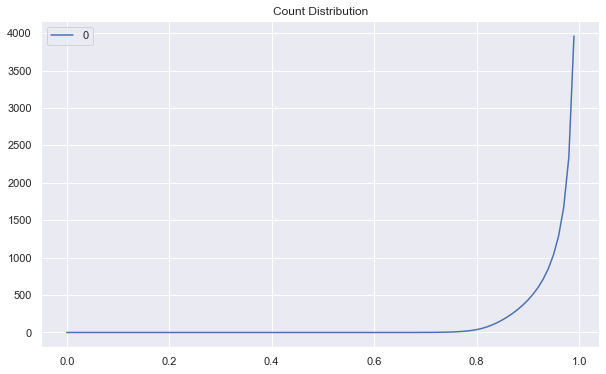

In [85]:
pd.DataFrame(df.values.flatten()).quantile(list(np.arange(0, 1, .01))).plot(title='Count Distribution')

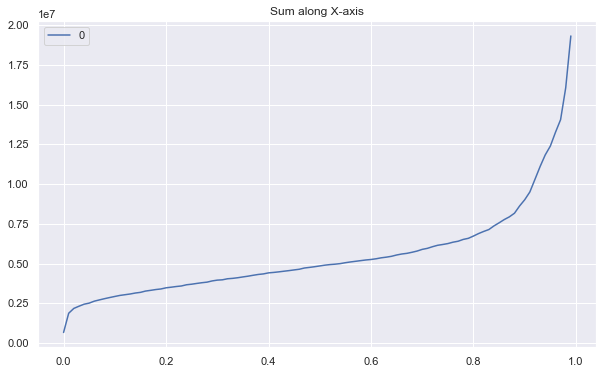

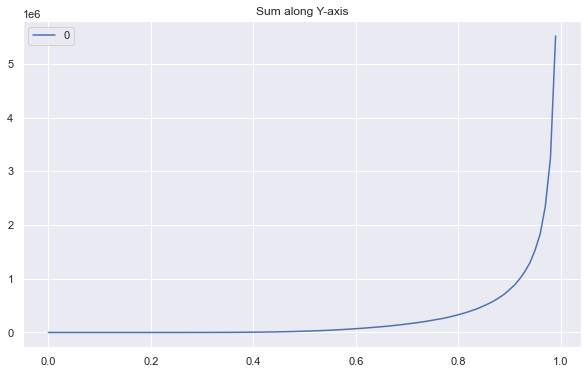

In [88]:
# plot sums along axes
pd.DataFrame(df.sum(axis=0)).quantile(list(np.arange(0, 1, .01))).plot(title='Sum along X-axis')
pd.DataFrame(df.sum(axis=1)).quantile(list(np.arange(0, 1, .01))).plot(title='Sum along Y-axis')

### PCA + KMeans

In [97]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

In [106]:
# set # of PCA components
N_PCA_COMPONENTS = 50

In [107]:
# quantile transformation due to nonlinearity
f_qt = QuantileTransformer(n_quantiles=1000)
qt_arr = f_qt.fit_transform(df.values)


In [114]:
reduced_data = PCA(n_components=2).fit_transform(qt_arr)

In [115]:
# perform K-means and visualize
kmeans = KMeans(init='k-means++', n_clusters=N_PCA_COMPONENTS, n_init=10)
kmeans.fit(reduced_data)

h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

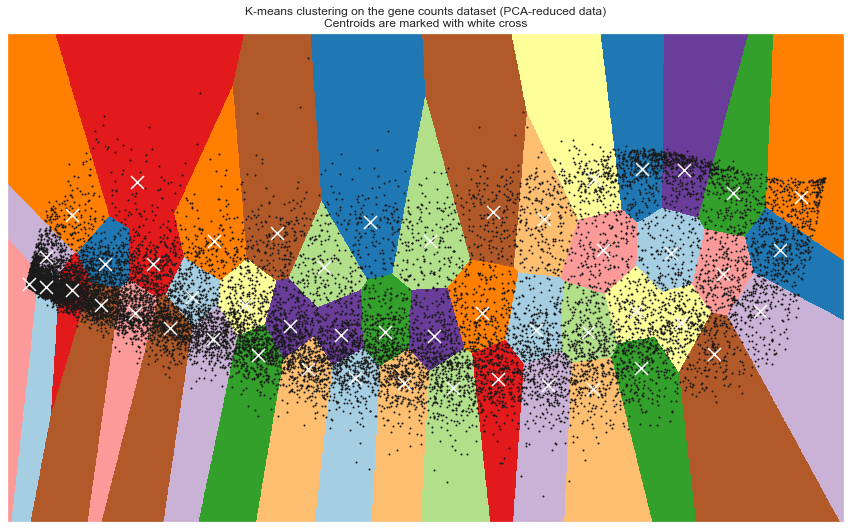

In [116]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the gene counts dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Try different clustering algorithms

In [123]:
from sklearn import cluster

In [120]:
# normalize dataset for easier parameter selection
X = QuantileTransformer(n_quantiles=1000).fit_transform(df.values)

In [121]:
params = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

In [125]:
# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

KeyboardInterrupt: 

In [124]:
# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
    ('Birch', birch),
    ('GaussianMixture', gmm)
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(f'Running algorithm: {algorithm}')

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
    if i_dataset == 0:
        plt.title(name, size=18)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
             transform=plt.gca().transAxes, size=15,
             horizontalalignment='right')
    plot_num += 1

plt.show()

KeyboardInterrupt: 